# Calculo de tiempo promedio por factura mes octubre

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv('facturas.csv')

### Columnas

In [29]:
# columnas
print(df.columns)

Index(['Factura_Fecha', 'Emp_Id', 'Suc_Id', 'Bodega_Id', 'Caja_Id',
       'TipoDoc_Id', 'Factura_Id', 'SubDoc_Id', 'Consecutivo_Factura',
       'Factura_FechaHora', 'MonederoTarj_Id', 'Monedero_Id', 'Cliente_Id',
       'Vendedor_Id', 'Preventa_Id', 'PreFactura_id',
       'Factura_Clave_Tributaria', 'Factura_Estado', 'Factura_Origen',
       'AnioMes_Id', 'Valor_Costo', 'Valor_Costo_Bonificacion',
       'Valor_Subtotal', 'Valor_Descuento', 'Valor_Impuesto', 'Valor_Total',
       'HashStr_SucEmp', 'HashStr_SubDDocEmp', 'HashStr_CliEmp',
       'HashStr_MonEmp', 'EmpMon_Id', 'HashStr_EmplEmp', 'HashStr_SucBodEmp',
       'Same_Id', 'Fecha_Actualizado', 'EmpSucDocCajFac_Id'],
      dtype='object')


### Promedio de tiempo inverido en las facturas
Puntos a considerar:
- Solo tomar la Caja_Id igual a 1
- Dividir por numero de sucursal de esta forma nos data un tiempo promedio por sucursal por cada factura
- Se tomara como muestra la hora pico es decir la hora donde hay mas facturas
- Columna Factura_FechaHora
- Columna Factura_Fecha

In [62]:
# cantidad de filas
print(len(df))

# Tomar solo Emp_Id = 1
df = df[df['Emp_Id'] == 1]

# cantidad de filas
print(len(df))

1488891
862392


Agrupar por:
- Sucursal_Id
- Caja_Id
- Fecha
- Hora
- Cantidad de facturas que se realizaron en esa hora

In [72]:
# agrupar por sucursal, Caja, Factura_Fecha y Factura_FechaHora
# Asegurarse de que la columna 'Factura_FechaHora' sea de tipo datetime
df['Factura_FechaHora'] = pd.to_datetime(df['Factura_FechaHora'], errors='coerce')
df_grouped = df.groupby(
    [df['Suc_Id'], df['Caja_Id'], df['Factura_Fecha'], df['Factura_FechaHora'].dt.hour]
)['Factura_Id'].count().reset_index(name='Cantidad_Facturas')

In [73]:
print(df_grouped)

        Suc_Id  Caja_Id Factura_Fecha  Factura_FechaHora  Cantidad_Facturas
0            1        1     1/10/2024                 13                  1
1            1        1     1/10/2024                 14                  1
2            1        1     1/10/2024                 15                  2
3            1        1     1/10/2024                 19                  1
4            1        1    10/10/2024                 11                  2
...        ...      ...           ...                ...                ...
185300     328        4     9/10/2024                 15                  1
185301     328        4     9/10/2024                 16                  1
185302     328        4     9/10/2024                 17                  4
185303     328        4     9/10/2024                 18                  2
185304     328        4     9/10/2024                 19                  3

[185305 rows x 5 columns]


In [74]:
# cantidad de filas donde la cantidad de facturas es mayor a 1
print(df_grouped[df_grouped['Cantidad_Facturas'] > 1].shape[0])
print(df_grouped[df_grouped['Cantidad_Facturas']== 1].shape[0])

# el valor mas alto de cantidad de facturas y que hora fue
print(df_grouped['Cantidad_Facturas'].max())

# imprimir fila con la cantidad de facturas mas alta
print(df_grouped[df_grouped['Cantidad_Facturas'] == df_grouped['Cantidad_Facturas'].max()])

# filas con cantidad de facturas mayor a 25
print(df_grouped[df_grouped['Cantidad_Facturas'] > 100].shape[0])

# Cual es la sucursal que hace 1 o menso facturas en una hora




155184
30121
48
       Suc_Id  Caja_Id Factura_Fecha  Factura_FechaHora  Cantidad_Facturas
95255     142        2    28/10/2024                  9                 48
0


### Eliminar valores de cantidad de facturas que esten por debajo del 5% de la cantidad de facturas de la hora pico

In [75]:
# Eliminar valores de cantidad de facturas que esten por debajo del 5% de la cantidad de facturas de la hora pico
df_grouped = df_grouped[df_grouped['Cantidad_Facturas'] > 10]

print(df_grouped['Cantidad_Facturas'].mean())

13.917546338625218


In [76]:
# sumar la cantidad de facturas por hora  y sacar la mediana, solo tomar esos dos valores y 2 decimales
df_grouped = df_grouped.groupby(
    [df_grouped['Factura_FechaHora']]
)['Cantidad_Facturas'].agg(['sum', 'median']).reset_index()

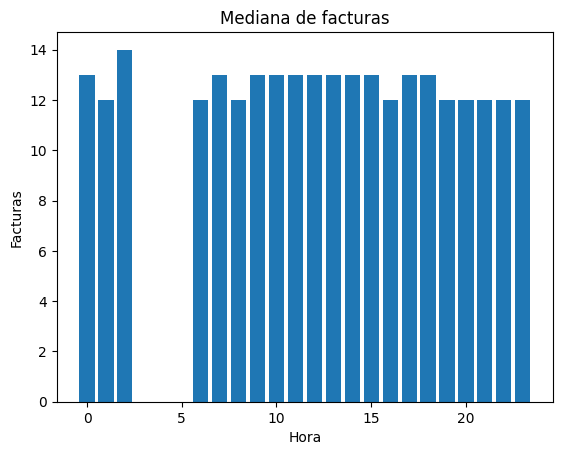

In [77]:
# graficar valor mean en función de la hora grafico de barras
fig, ax = plt.subplots()
ax.bar(df_grouped['Factura_FechaHora'], df_grouped['median'])
ax.set_xlabel('Hora')
ax.set_ylabel('Facturas')
ax.set_title('Mediana de facturas')

plt.show()


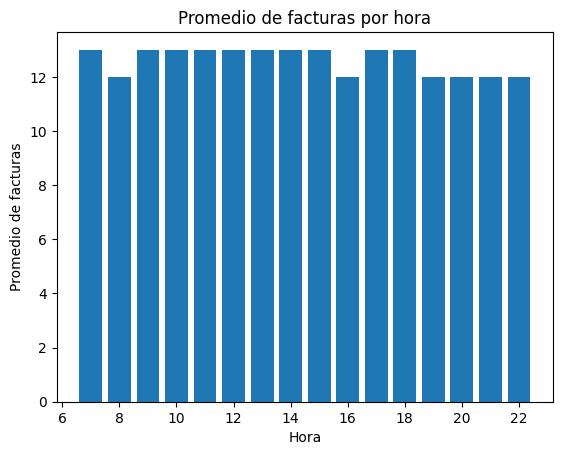

    Factura_FechaHora    sum  median
4                   7   1265    13.0
5                   8   3768    12.0
6                   9   9811    13.0
7                  10  13361    13.0
8                  11  13920    13.0
9                  12  18754    13.0
10                 13  13775    13.0
11                 14  10871    13.0
12                 15  12154    13.0
13                 16  14947    12.0
14                 17  18549    13.0
15                 18  17704    13.0
16                 19   9846    12.0
17                 20   4033    12.0
18                 21   2346    12.0
19                 22   1311    12.0


In [78]:
# Solo quedarse con Factura_FechaHora entre las 9 y las 8
df_grouped = df_grouped[(df_grouped['Factura_FechaHora'] >= 7) & (df_grouped['Factura_FechaHora'] <= 22)]
# graficar valor mean en función de la hora grafico de barras
fig, ax = plt.subplots()
ax.bar(df_grouped['Factura_FechaHora'], df_grouped['median'])
ax.set_xlabel('Hora')
ax.set_ylabel('Promedio de facturas')
ax.set_title('Promedio de facturas por hora')

plt.show()
print(df_grouped)

## Promedio de facturas en hora pico

In [79]:
# promedio de mean redondeado a 2 decimales
print(df_grouped['median'].mean().round(2))

12.62


## Tiempo de atencion promedio de facturación mes de Octubre

In [80]:
# redondear a 2 decimales el promedio de mean y dividir 60 entre ese valor
mean_mean = df_grouped['median'].mean().round(2)
print((60 / mean_mean).round(2))    

4.75
